# 6.6 WH Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the World Happiness Report data

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') # Define styling option for plots.

In [2]:
# Option to ensure the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Data Analytics Immersion/Achievement 6/World_Happiness_Analysis'

In [4]:
# Import world happiness data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_combined_all_years.csv'), index_col = 0)

In [5]:
df.shape

(741, 11)

In [6]:
df.head(10)

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
0,Finland,Western Europe,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,Switzerland,Western Europe,2019,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,Sweden,Western Europe,2019,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,New Zealand,North America and ANZ,2019,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,Canada,North America and ANZ,2019,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,Austria,Western Europe,2019,10,7.246,1.376,1.475,1.016,0.532,0.244,0.226


### In this dataframe, time = year. For each country, there is a dimension that changes each year (each of the other columns on the dataframe from happiness_score onwards). I will pick "Happiness_score" to have a closer look at it, and compare it across countries. In particular, I will try to answer the question: "how the happiness score behaves from 2019 to 2023 for the top 10 countries?". To do that, I firstly need to individuate the top 10 countries.

### 2. Subsetting, wrangling, and cleaning time-series data

In [7]:
# Check for missing values

df.isnull().sum()

Country                  0
Region                   0
Year                     0
Happiness_rank           0
Happiness_score          0
GDP_capita               0
Social_support           0
Life_expectancy          1
Freedom                  0
Generosity               0
Corruption_perception    0
dtype: int64

In [8]:
# Impute missing values with median

df['Life_expectancy'].fillna(df['Life_expectancy'].median(), inplace=True)

In [9]:
# Check for duplicates

dups = df.duplicated()
dups.sum()

# No dups!

0

In [10]:
df.dtypes

Country                   object
Region                    object
Year                       int64
Happiness_rank             int64
Happiness_score          float64
GDP_capita               float64
Social_support           float64
Life_expectancy          float64
Freedom                  float64
Generosity               float64
Corruption_perception    float64
dtype: object

In [11]:
# Create a subset of top 10 countries in 2019 based on happiness rank

top_10_2019 = df.loc[(df['Year'] == 2019) & (df['Happiness_rank'] <= 10)]

In [12]:
top_10_2019.shape

(10, 11)

In [13]:
top_10_2019.head(10)

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
0,Finland,Western Europe,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,Switzerland,Western Europe,2019,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,Sweden,Western Europe,2019,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,New Zealand,North America and ANZ,2019,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,Canada,North America and ANZ,2019,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,Austria,Western Europe,2019,10,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [14]:
# Converting "Country" to list

list_2019 = top_10_2019['Country'].tolist()

list_2019

['Finland',
 'Denmark',
 'Norway',
 'Iceland',
 'Netherlands',
 'Switzerland',
 'Sweden',
 'New Zealand',
 'Canada',
 'Austria']

In [15]:
# Create a subset of top 10 countries in 2020 based on happiness rank

top_10_2020 = df.loc[(df['Year'] == 2020) & (df['Happiness_rank'] <= 10)]

In [16]:
top_10_2020.shape

(10, 11)

In [17]:
top_10_2020.head(10)

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
156,Finland,Western Europe,2020,1,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
157,Denmark,Western Europe,2020,2,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
158,Switzerland,Western Europe,2020,3,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
159,Iceland,Western Europe,2020,4,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
160,Norway,Western Europe,2020,5,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
161,Netherlands,Western Europe,2020,6,7.4489,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570
162,Sweden,Western Europe,2020,7,7.3535,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066
163,New Zealand,North America and ANZ,2020,8,7.2996,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268
164,Austria,Western Europe,2020,9,7.2942,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256
165,Luxembourg,Western Europe,2020,10,7.2375,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041


In [18]:
# Converting "Country" to list

list_2020 = top_10_2020['Country'].tolist()

list_2020

['Finland',
 'Denmark',
 'Switzerland',
 'Iceland',
 'Norway',
 'Netherlands',
 'Sweden',
 'New Zealand',
 'Austria',
 'Luxembourg']

In [19]:
# Create a subset of top 10 countries in 2021 based on happiness rank

top_10_2021 = df.loc[(df['Year'] == 2021) & (df['Happiness_rank'] <= 10)]

In [20]:
top_10_2021.shape

(10, 11)

In [21]:
top_10_2021.head(10)

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
309,Finland,Western Europe,2021,1,7.842,1.446,1.106,0.741,0.691,0.124,0.481
310,Denmark,Western Europe,2021,2,7.620,1.502,1.108,0.763,0.686,0.208,0.485
311,Switzerland,Western Europe,2021,3,7.571,1.566,1.079,0.816,0.653,0.204,0.413
312,Iceland,Western Europe,2021,4,7.554,1.482,1.172,0.772,0.698,0.293,0.170
313,Netherlands,Western Europe,2021,5,7.464,1.501,1.079,0.753,0.647,0.302,0.384
314,Norway,Western Europe,2021,6,7.392,1.543,1.108,0.782,0.703,0.249,0.427
315,Sweden,Western Europe,2021,7,7.363,1.478,1.062,0.763,0.685,0.244,0.448
316,Luxembourg,Western Europe,2021,8,7.324,1.751,1.003,0.760,0.639,0.166,0.353
317,New Zealand,North America and ANZ,2021,9,7.277,1.400,1.094,0.785,0.665,0.276,0.445
318,Austria,Western Europe,2021,10,7.268,1.492,1.062,0.782,0.640,0.215,0.292


In [22]:
# Converting "Country" to list

list_2021 = top_10_2021['Country'].tolist()

list_2021

['Finland',
 'Denmark',
 'Switzerland',
 'Iceland',
 'Netherlands',
 'Norway',
 'Sweden',
 'Luxembourg',
 'New Zealand',
 'Austria']

In [23]:
# Create a subset of top 10 countries in 2022 based on happiness rank

top_10_2022 = df.loc[(df['Year'] == 2022) & (df['Happiness_rank'] <= 10)]

In [24]:
top_10_2022.shape

(10, 11)

In [25]:
top_10_2022.head(10)

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
458,Finland,Western Europe,2022,1,7.821,1.892,1.258,0.775,0.736,0.109,0.534
459,Denmark,Western Europe,2022,2,7.636,1.953,1.243,0.777,0.719,0.188,0.532
460,Iceland,Western Europe,2022,3,7.557,1.936,1.320,0.803,0.718,0.270,0.191
461,Switzerland,Western Europe,2022,4,7.512,2.026,1.226,0.822,0.677,0.147,0.461
462,Netherlands,Western Europe,2022,5,7.415,1.945,1.206,0.787,0.651,0.271,0.419
463,Luxembourg,Western Europe,2022,6,7.404,2.209,1.155,0.790,0.700,0.120,0.388
464,Sweden,Western Europe,2022,7,7.384,1.920,1.204,0.803,0.724,0.218,0.512
465,Norway,Western Europe,2022,8,7.365,1.997,1.239,0.786,0.728,0.217,0.474
466,Israel,Middle East and North Africa,2022,9,7.364,1.826,1.221,0.818,0.568,0.155,0.143
467,New Zealand,North America and ANZ,2022,10,7.200,1.852,1.235,0.752,0.680,0.245,0.483


In [26]:
# Converting "Country" to list

list_2022 = top_10_2022['Country'].tolist()

list_2022

['Finland',
 'Denmark',
 'Iceland',
 'Switzerland',
 'Netherlands',
 'Luxembourg',
 'Sweden',
 'Norway',
 'Israel',
 'New Zealand']

In [27]:
# Create a subset of top 10 countries in 2023 based on happiness rank

top_10_2023 = df.loc[(df['Year'] == 2023) & (df['Happiness_rank'] <= 10)]

In [28]:
top_10_2023.shape

(10, 11)

In [29]:
top_10_2023.head(10)

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
604,Finland,Western Europe,2023,1,7.804,1.888,1.585,0.535,0.772,0.126,0.535
605,Denmark,Western Europe,2023,2,7.586,1.949,1.548,0.537,0.734,0.208,0.525
606,Iceland,Western Europe,2023,3,7.530,1.926,1.620,0.559,0.738,0.250,0.187
607,Israel,Middle East and North Africa,2023,4,7.473,1.833,1.521,0.577,0.569,0.124,0.158
608,Netherlands,Western Europe,2023,5,7.403,1.942,1.488,0.545,0.672,0.251,0.394
609,Sweden,Western Europe,2023,6,7.395,1.921,1.510,0.562,0.754,0.225,0.520
610,Norway,Western Europe,2023,7,7.315,1.994,1.521,0.544,0.752,0.212,0.463
611,Switzerland,Western Europe,2023,8,7.240,2.022,1.463,0.582,0.678,0.151,0.475
612,Luxembourg,Western Europe,2023,9,7.228,2.200,1.357,0.549,0.710,0.149,0.418
613,New Zealand,North America and ANZ,2023,10,7.123,1.842,1.544,0.513,0.672,0.230,0.471


In [30]:
# Converting "Country" to list

list_2023 = top_10_2023['Country'].tolist()

list_2023

['Finland',
 'Denmark',
 'Iceland',
 'Israel',
 'Netherlands',
 'Sweden',
 'Norway',
 'Switzerland',
 'Luxembourg',
 'New Zealand']

In [31]:
# Finding the intersection of all country lists

common_country = set(list_2019) & set(list_2020) & set(list_2021) & set(list_2022) & set(list_2023)

In [32]:
# Calculating the number of common countries

len(common_country)

8

In [33]:
# Filter df by common_country list

df_common = df[df['Country'].isin(common_country)]

In [34]:
df_common.shape

(40, 11)

In [35]:
df_common.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
0,Finland,Western Europe,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Since the top 10 countries change year by year, I decided to find the common countries in the top 10 list for each year, and to focus the time series analysis on those ones only.

In [36]:
# Extract the columns I need for the analysis from df_common

df_score = df_common[['Year', 'Happiness_score']]

In [37]:
df_score.shape

(40, 2)

In [38]:
df_score.head()

,Year,Happiness_score
0,2019,7.769
1,2019,7.600
2,2019,7.554
3,2019,7.494
4,2019,7.488


In [45]:
# Set the "Year" column as the index

df_score = df_score.reset_index().set_index('Year')

In [46]:
# Drop "index" column

df_score = df_score.drop(['index'], axis=1)
df_score

,Happiness_score
Year,
2019,7.7690
2019,7.6000
2019,7.5540
2019,7.4940
2019,7.4880
2019,7.4800
2019,7.3430
2019,7.3070
2020,7.8087


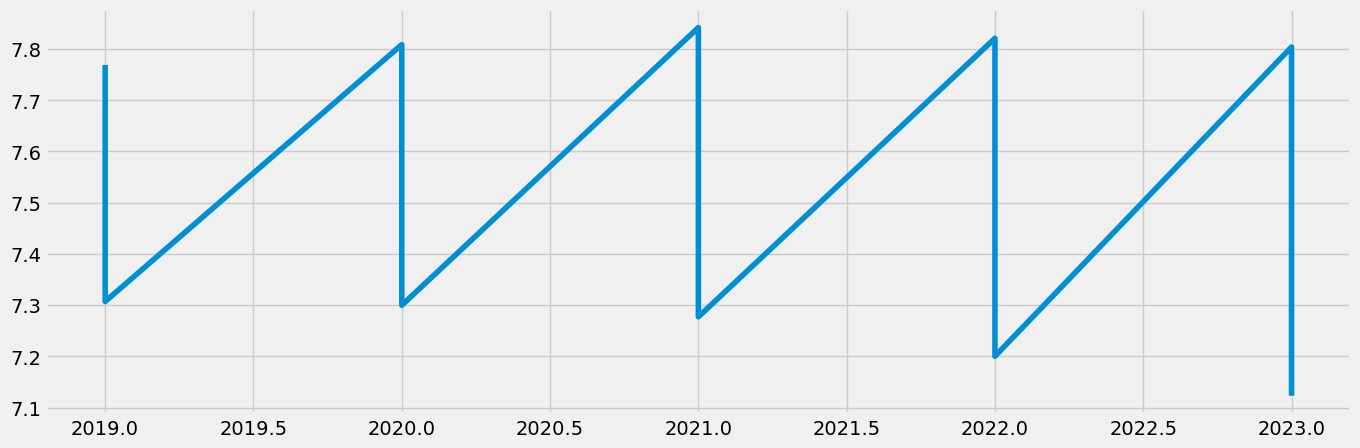

In [47]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_score)

### 3. Time-series analysis: decomposition

In [48]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_score, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None